In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Valorant_Champoins_edited.csv')
df = df.drop(['Rnd','R','KAST','K','D','A','FK','FD','CLSuc','CLSit','CL%'], axis = 1)
df
player = df['Player']

In [3]:
X_train = df.drop(['Player'], axis = 1)
X_train

,ACS,K:D,ADR,KPR,APR,FKPR,FDPR,HS%,KMax
0,254.6,1.50,159.8,0.93,0.09,0.20,0.08,0.26,30
1,260.0,1.36,160.9,0.89,0.30,0.23,0.12,0.23,26
2,245.0,1.31,156.1,0.86,0.21,0.15,0.09,0.28,25
3,210.5,1.25,137.5,0.76,0.39,0.08,0.04,0.34,21
4,247.9,1.39,166.2,0.92,0.13,0.17,0.15,0.34,31
...,...,...,...,...,...,...,...,...,...
76,159.6,0.68,106.5,0.53,0.28,0.08,0.15,0.31,18
77,146.4,0.70,108.3,0.54,0.35,0.04,0.19,0.27,28
78,136.9,0.66,95.6,0.47,0.32,0.03,0.05,0.29,14
79,175.6,0.77,117.4,0.61,0.12,0.12,0.23,0.25,17


In [4]:
scaler = PowerTransformer()
X_train_scaled = scaler.fit_transform(X_train)
df_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
df_scaled

,ACS,K:D,ADR,KPR,APR,FKPR,FDPR,HS%,KMax
0,1.869221,2.522649,1.736767,2.131468,-2.058450,1.602617,-0.426904,-0.154570,1.263678
1,2.005367,1.976612,1.787276,1.849697,0.370206,1.877634,0.587989,-0.774365,0.598630
2,1.617744,1.765867,1.563325,1.627607,-0.635977,1.017810,-0.136942,0.245499,0.415955
3,0.597010,1.500844,0.597766,0.812672,1.330931,-0.181876,-1.905605,1.387231,-0.397809
4,1.695031,2.098904,2.024191,2.062503,-1.573177,1.273420,1.140268,1.387231,1.415709
...,...,...,...,...,...,...,...,...,...
76,-1.383428,-1.939700,-1.487191,-1.627829,0.150725,-0.181876,1.140268,0.826962,-1.118948
77,-2.033876,-1.780711,-1.344412,-1.501039,0.909227,-1.162035,1.682523,0.046741,0.943343
78,-2.550568,-2.102447,-2.428002,-2.437781,0.587446,-1.451998,-1.481076,0.441754,-2.295673
79,-0.682066,-1.252036,-0.669086,-0.672180,-1.693407,0.568934,2.067904,-0.358487,-1.386567


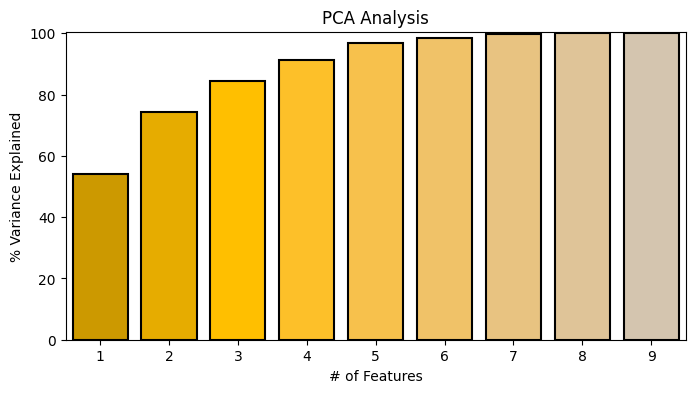

In [5]:
pca = PCA(n_components=9)
pca.fit(df_scaled)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
features = np.arange(1,10,1)

pca_variance = pd.DataFrame({'features': features, 'variance': var})

cust_color_pca = ['#cc9900', '#e6ac00', '#ffbf00', '#fdc029', '#f7c14c', '#f0c268', '#e8c381','#dfc498','#d4c5af',
'#B8B8B8', '#A9A9A9', '#A0A0A0', '#909090', '#808080', '#707070', '#696969', '#606060', '#585858', '#484848', '#404040',
'#383838', '#303030', '#282828', '#202020', '#101010', '#000000']

plt.figure(figsize=(8,4))
sns.barplot(x=pca_variance.features, y=pca_variance.variance, data=pca_variance, edgecolor='black', linewidth=1.5, saturation=1.5, palette=cust_color_pca);
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5);

In [6]:
clusters = np.arange(2, 20)

inertias = []

for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled.iloc[:10000,:])
    inertias.append(km.inertia_)
    
kmeans = list(zip(clusters, inertias))
kmeans_df = pd.DataFrame(kmeans, columns=['clusters',  'interias'])  

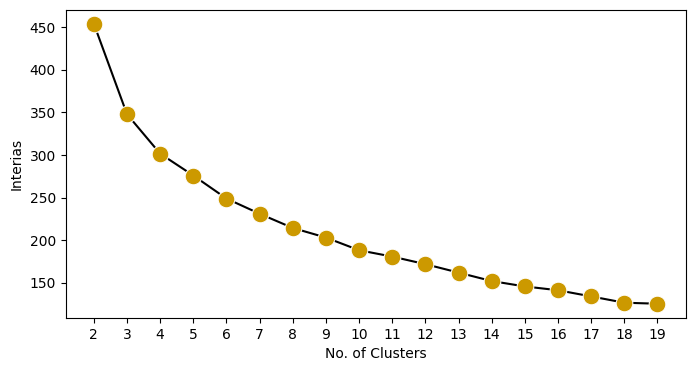

In [7]:
plt.figure(figsize=(8,4))
sns.lineplot(x='clusters', y='interias', data=kmeans_df, color='black', marker='o', markerfacecolor=cust_color_pca[0], markersize=12);
plt.ylabel('Interias')
plt.xlabel('No. of Clusters')
plt.xticks(np.arange(2, 20, step=1));

In [8]:
gmm = GaussianMixture(n_components=4, random_state=3, verbose=3, n_init=10)
gmm_preds = gmm.fit_predict(df_scaled)

Initialization 0
Initialization converged: True	 time lapse 0.02240s	 ll -5.41424
Initialization 1
Initialization converged: True	 time lapse 0.06833s	 ll -5.40241
Initialization 2
  Iteration 10	 time lapse 0.03500s	 ll change 0.06033
Initialization converged: True	 time lapse 0.03690s	 ll -5.35506
Initialization 3
  Iteration 10	 time lapse 0.03191s	 ll change 0.01457
Initialization converged: True	 time lapse 0.04986s	 ll -5.31523
Initialization 4
Initialization converged: True	 time lapse 0.14913s	 ll -5.21608
Initialization 5
  Iteration 10	 time lapse 0.02545s	 ll change 0.00427
Initialization converged: True	 time lapse 0.02945s	 ll -5.27953
Initialization 6
Initialization converged: True	 time lapse 0.01694s	 ll -5.28131
Initialization 7
Initialization converged: True	 time lapse 0.01297s	 ll -4.58760
Initialization 8
  Iteration 10	 time lapse 0.01795s	 ll change 0.00145
Initialization converged: True	 time lapse 0.01895s	 ll -5.32810
Initialization 9
Initialization converged:

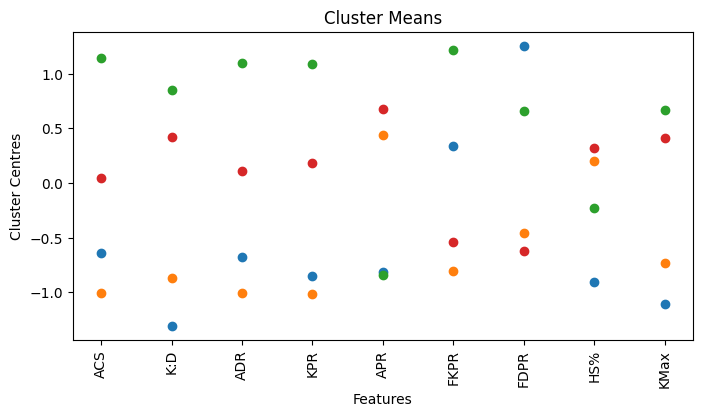

In [9]:
plt.figure(figsize=(8, 4))
for i in range(gmm.means_.shape[0]):
    plt.scatter(np.arange(df_scaled.shape[1]), gmm.means_[i])
plt.xticks(ticks=np.arange(df_scaled.shape[1]), labels=df_scaled.columns, rotation=90)
plt.title('Cluster Means')
plt.ylabel('Cluster Centres')
plt.xlabel('Features');
plt.show()

In [10]:
gmm = GaussianMixture(n_components=4, random_state=3, verbose=0, n_init=10, max_iter=500)
gmm_preds = gmm.fit_predict(df_scaled)

In [11]:
bgmm = BayesianGaussianMixture(n_components=4, random_state=3, verbose=0, covariance_type='full', max_iter=500, n_init=10, init_params='random')
bgmm_preds = bgmm.fit_predict(X_train)

In [12]:
for i in range(len(player)):
    print(f'{player[i]} ----> {bgmm_preds[i]}')

yay ----> 0
kiNgg ----> 2
Laz ----> 0
pancada ----> 2
Derke ----> 0
Shao ----> 1
Cryocells ----> 0
Sacy ----> 1
MaKo ----> 1
Less ----> 0
keznit ----> 3
SUYGETSU ----> 1
Alfajer ----> 3
Zyppan ----> 2
Mistic ----> 1
ScreaM ----> 2
Mazino ----> 3
NagZ ----> 0
Will ----> 2
Jamppi ----> 2
crashies ----> 1
ardiis ----> 2
BuZz ----> 2
CHICHOO ----> 1
saadhak ----> 1
Melser ----> 3
bang ----> 1
BcJ ----> 1
ZmjjKK ----> 0
sScary ----> 3
aspas ----> 3
d4v41 ----> 3
Shyy ----> 1
Boaster ----> 1
dgzin ----> 1
Smoggy ----> 2
Marved ----> 1
stax ----> 1
zekken ----> 2
Victor ----> 1
Enzo ----> 1
Zest ----> 1
Dep ----> 2
Crws ----> 2
nzr ----> 3
Tacolilla ----> 3
AYRIN ----> 3
Nivera ----> 1
Quick ----> 3
delz1k ----> 1
f0rsakeN ----> 0
fl1pzjder ----> 0
tehbotoL ----> 0
Rb ----> 1
SugarZ3ro ----> 1
adverso ----> 1
mindfreak ----> 1
dimasick ----> 1
dephh ----> 1
Jinggg ----> 2
FNS ----> 1
blaZek1ng ----> 1
stellar ----> 1
TENNN ----> 1
soulcas ----> 1
Haodong ----> 1
Derrek ----> 1
Benkai ----> 1


In [13]:
player_dict = dict(zip(player,bgmm_preds))

In [14]:
player_dict

{'yay': 0,
 'kiNgg': 2,
 'Laz': 0,
 'pancada': 2,
 'Derke': 0,
 'Shao': 1,
 'Cryocells': 0,
 'Sacy': 1,
 'MaKo': 1,
 'Less': 0,
 'keznit': 3,
 'SUYGETSU': 1,
 'Alfajer': 3,
 'Zyppan': 2,
 'Mistic': 1,
 'ScreaM': 2,
 'Mazino': 3,
 'NagZ': 0,
 'Will': 2,
 'Jamppi': 2,
 'crashies': 1,
 'ardiis': 2,
 'BuZz': 2,
 'CHICHOO': 1,
 'saadhak': 1,
 'Melser': 3,
 'bang': 1,
 'BcJ': 1,
 'ZmjjKK': 0,
 'sScary': 3,
 'aspas': 3,
 'd4v41': 3,
 'Shyy': 1,
 'Boaster': 1,
 'dgzin': 1,
 'Smoggy': 2,
 'Marved': 1,
 'stax': 1,
 'zekken': 2,
 'Victor': 1,
 'Enzo': 1,
 'Zest': 1,
 'Dep': 2,
 'Crws': 2,
 'nzr': 3,
 'Tacolilla': 3,
 'AYRIN': 3,
 'Nivera': 1,
 'Quick': 3,
 'delz1k': 1,
 'f0rsakeN': 0,
 'fl1pzjder': 0,
 'tehbotoL': 0,
 'Rb': 1,
 'SugarZ3ro': 1,
 'adverso': 1,
 'mindfreak': 1,
 'dimasick': 1,
 'dephh': 1,
 'Jinggg': 2,
 'FNS': 1,
 'blaZek1ng': 1,
 'stellar': 1,
 'TENNN': 1,
 'soulcas': 1,
 'Haodong': 1,
 'Derrek': 1,
 'Benkai': 1,
 'Klaus': 3,
 'nobody': 1,
 'Asuna': 3,
 'Famouz': 1,
 'foxz': 2,
 '

In [15]:
for i in player_dict:
    if player_dict.get(i) ==1:
        print(i)


Shao
Sacy
MaKo
SUYGETSU
Mistic
crashies
CHICHOO
saadhak
bang
BcJ
Shyy
Boaster
dgzin
Marved
stax
Victor
Enzo
Zest
Nivera
delz1k
Rb
SugarZ3ro
adverso
mindfreak
dimasick
dephh
FNS
blaZek1ng
stellar
TENNN
soulcas
Haodong
Derrek
Benkai
nobody
Famouz
Sushiboys
ANGE1
crow


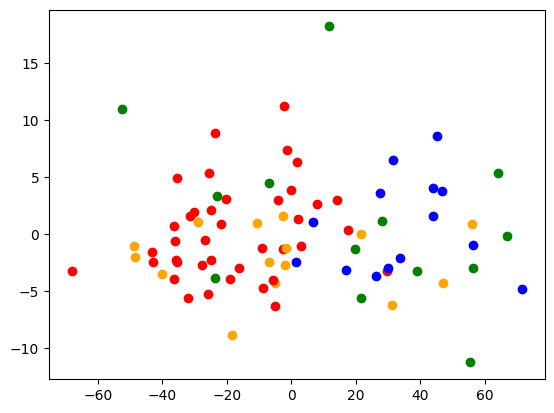

In [16]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
#print(X_train_pca)
for i in range(len(player)):
    if bgmm_preds[i] == 1:
        plt.scatter(X_train_pca[i,0],X_train_pca[i,1],c = 'r')
    elif bgmm_preds[i] == 2:
        plt.scatter(X_train_pca[i,0],X_train_pca[i,1],c = 'b')
    elif bgmm_preds[i] == 0:
        plt.scatter(X_train_pca[i,0],X_train_pca[i,1],c = 'g')
    elif bgmm_preds[i] == 3:
        plt.scatter(X_train_pca[i,0],X_train_pca[i,1],c = 'orange')

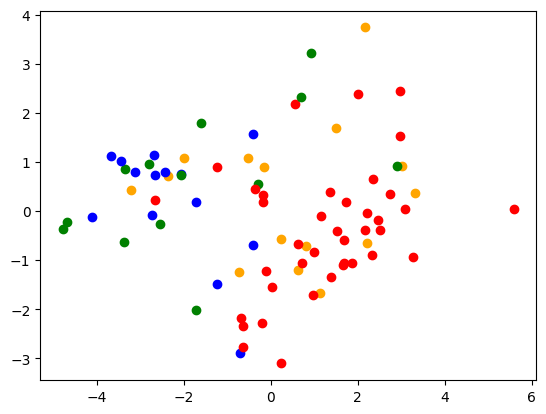

In [17]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(df_scaled)
#print(X_train_pca)
for i in range(len(player)):
    if bgmm_preds[i] == 1:
        plt.scatter(X_train_pca[i,0],X_train_pca[i,1],c = 'r')
    elif bgmm_preds[i] == 2:
        plt.scatter(X_train_pca[i,0],X_train_pca[i,1],c = 'b')
    elif bgmm_preds[i] == 0:
        plt.scatter(X_train_pca[i,0],X_train_pca[i,1],c = 'g')
    elif bgmm_preds[i] == 3:
        plt.scatter(X_train_pca[i,0],X_train_pca[i,1],c = 'orange')

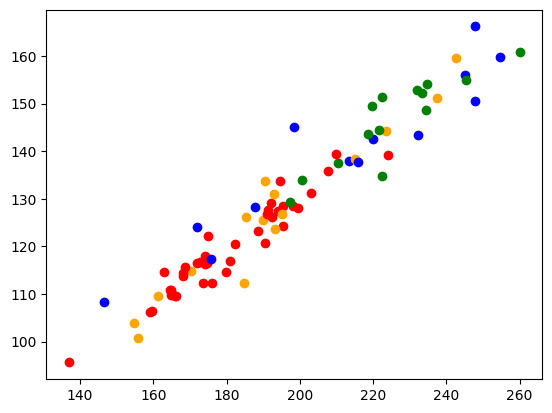

In [18]:
for i in range(len(player)):
    if bgmm_preds[i] == 1:
        plt.scatter(X_train.ACS[i],X_train.ADR[i],c = 'r')
    elif bgmm_preds[i] == 2:
        plt.scatter(X_train.ACS[i],X_train.ADR[i],c = 'g')
    elif bgmm_preds[i] == 0:
        plt.scatter(X_train.ACS[i],X_train.ADR[i],c = 'b')
    elif bgmm_preds[i] == 3:
        plt.scatter(X_train.ACS[i],X_train.ADR[i],c = 'orange')

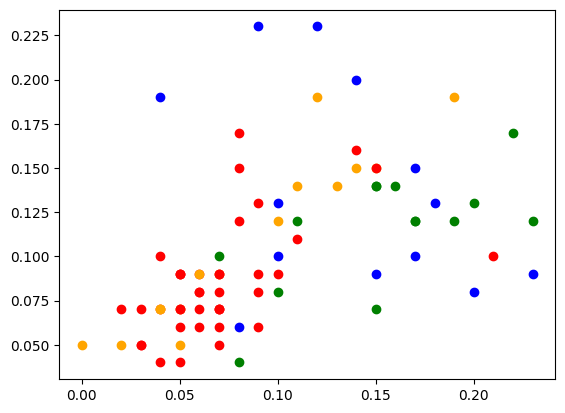

In [19]:
for i in range(len(player)):
    if bgmm_preds[i] == 1:
        plt.scatter(X_train.FKPR[i],X_train.FDPR[i],c = 'r')
    elif bgmm_preds[i] == 2:
        plt.scatter(X_train.FKPR[i],X_train.FDPR[i],c = 'g')
    elif bgmm_preds[i] == 0:
        plt.scatter(X_train.FKPR[i],X_train.FDPR[i],c = 'b')
    elif bgmm_preds[i] == 3:
        plt.scatter(X_train.FKPR[i],X_train.FDPR[i],c = 'orange')

In [31]:
import umap



In [53]:
manifold = umap.UMAP(n_neighbors = 100,  min_dist = 0.5, metric = 'correlation').fit(X_train,bgmm_preds)
X_reduced = manifold.transform(X_train)
X_reduced.shape

C:\Users\SAGOYAL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


(81, 2)

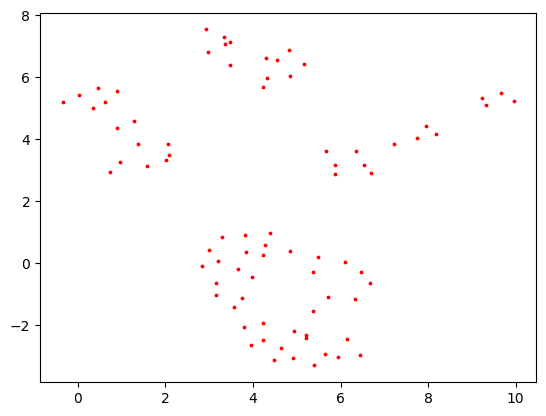

In [54]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c = 'r',s = 3)

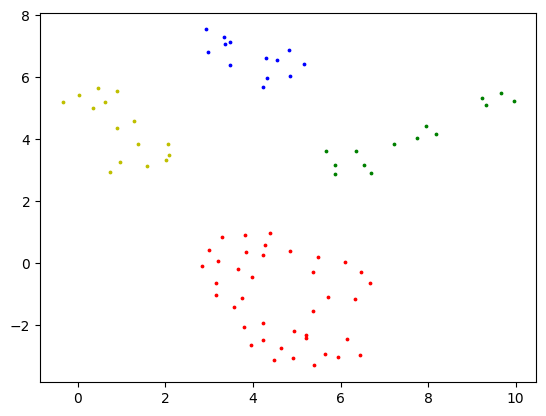

In [55]:
for i in range(len(player)):
    if bgmm_preds[i] == 1:
        plt.scatter(X_reduced[i,0],X_reduced[i,1],c = 'r', s = 3)
    elif bgmm_preds[i] == 2:
        plt.scatter(X_reduced[i,0],X_reduced[i,1],c = 'g', s = 3)
    elif bgmm_preds[i] == 0:
        plt.scatter(X_reduced[i,0],X_reduced[i,1],c = 'b', s = 3)
    elif bgmm_preds[i] == 3:
        plt.scatter(X_reduced[i,0],X_reduced[i,1],c = 'y', s = 3)


In [28]:
umap.plot.points(manifold, labels=bgmm_preds, theme="fire");

AttributeError: module 'umap' has no attribute 'plot'